In [103]:
import pandas as pd
import numpy as np
white_wine=pd.read_csv('../../practice/winequality-white.csv', sep=';')
red_wine=pd.read_csv('../../practice/winequality-red.csv', sep=';')
white_wine.columns=white_wine.columns.str.replace(' ','_')
red_wine.columns=red_wine.columns.str.replace(' ','_')
white_wine['wine_type']=0
red_wine['wine_type']=1
total_wine=pd.concat([white_wine, red_wine])


In [104]:
total_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [105]:
# so I use other method to remove outliers
def outliers_idr(df):
    
    num=df.count(axis=1)
    num_col=num[1]
    
    i=0
    for colu in df:
        mean_df=df[colu].mean()
        std_df=df[colu].std()
        df_out= df[(df[colu] <= 3*std_df+mean_df) & (df[colu] >= (mean_df-3*std_df))]
        df=df_out
        i=i+1
        
    return df_out




total_wine=outliers_idr(total_wine)
total_wine= total_wine.set_index(np.arange(len(total_wine)))



In [106]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

cohen=[]
score=[]
confusion=[]
class_out=[]
for i in range(10): 
    model=LogisticRegression()
    x=total_wine.drop(columns='wine_type')
    y=total_wine['wine_type']
    x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
    scale=MinMaxScaler()
    x_train_n= scale.fit_transform(x_train)
    x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
    x_test_n= scale.transform(x_test)
    x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=accuracy_score(pred, y_test)
    score.append(scor)

    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    i +=1
print('score :\n', np.mean(score),'\ncohen: \n',np.mean(cohen),'\nconfusion \n',confusion, 'classification: \n',class_out)

score :
 0.9943693693693694 
cohen: 
 0.9830509206756878 
confusion 
 [array([[1383,    6],
       [   5,  382]]), array([[1390,    1],
       [   4,  381]]), array([[1419,    2],
       [   4,  351]]), array([[1395,    5],
       [   3,  373]]), array([[1406,    2],
       [  10,  358]]), array([[1424,    3],
       [   6,  343]]), array([[1416,    4],
       [   6,  350]]), array([[1374,    4],
       [   4,  394]]), array([[1375,    4],
       [  11,  386]]), array([[1394,    6],
       [  10,  366]])] classification: 
 ['              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1389\n           1       0.98      0.99      0.99       387\n\n    accuracy                           0.99      1776\n   macro avg       0.99      0.99      0.99      1776\nweighted avg       0.99      0.99      0.99      1776\n', '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1391\n           1       

score :
 0.9846283783783782 
cohen: 
 0.9546648536050109 
confusion 
 [array([[1385,   12],
       [  13,  366]]), array([[1363,   19],
       [   6,  388]]), array([[1375,   13],
       [  22,  366]]), array([[1374,   14],
       [  19,  369]]), array([[1375,   10],
       [  10,  381]]), array([[1384,   10],
       [  13,  369]]), array([[1374,   18],
       [  17,  367]]), array([[1386,   11],
       [  13,  366]]), array([[1376,   13],
       [  13,  374]]), array([[1387,   13],
       [  14,  362]])] classification: 
 ['              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      1397\n           1       0.97      0.97      0.97       379\n\n    accuracy                           0.99      1776\n   macro avg       0.98      0.98      0.98      1776\nweighted avg       0.99      0.99      0.99      1776\n', '              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99      1382\n           1       

[Text(0.4868527508090615, 0.9722222222222222, 'X[4] <= 0.354\ngini = 0.337\nsamples = 4143\nvalue = [3253, 890]'),
 Text(0.21448220064724918, 0.9166666666666666, 'X[6] <= 0.121\ngini = 0.057\nsamples = 3155\nvalue = [3062, 93]'),
 Text(0.062135922330097085, 0.8611111111111112, 'X[4] <= 0.189\ngini = 0.349\nsamples = 80\nvalue = [18, 62]'),
 Text(0.041423948220064725, 0.8055555555555556, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.08284789644012945, 0.8055555555555556, 'X[9] <= 0.243\ngini = 0.138\nsamples = 67\nvalue = [5, 62]'),
 Text(0.041423948220064725, 0.75, 'X[5] <= 0.037\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.020711974110032363, 0.6944444444444444, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.062135922330097085, 0.6944444444444444, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.12427184466019417, 0.75, 'X[7] <= 0.258\ngini = 0.061\nsamples = 63\nvalue = [2, 61]'),
 Text(0.10355987055016182, 0.6944444444444444, 'gini = 0.0\nsamples = 1\nvalue 

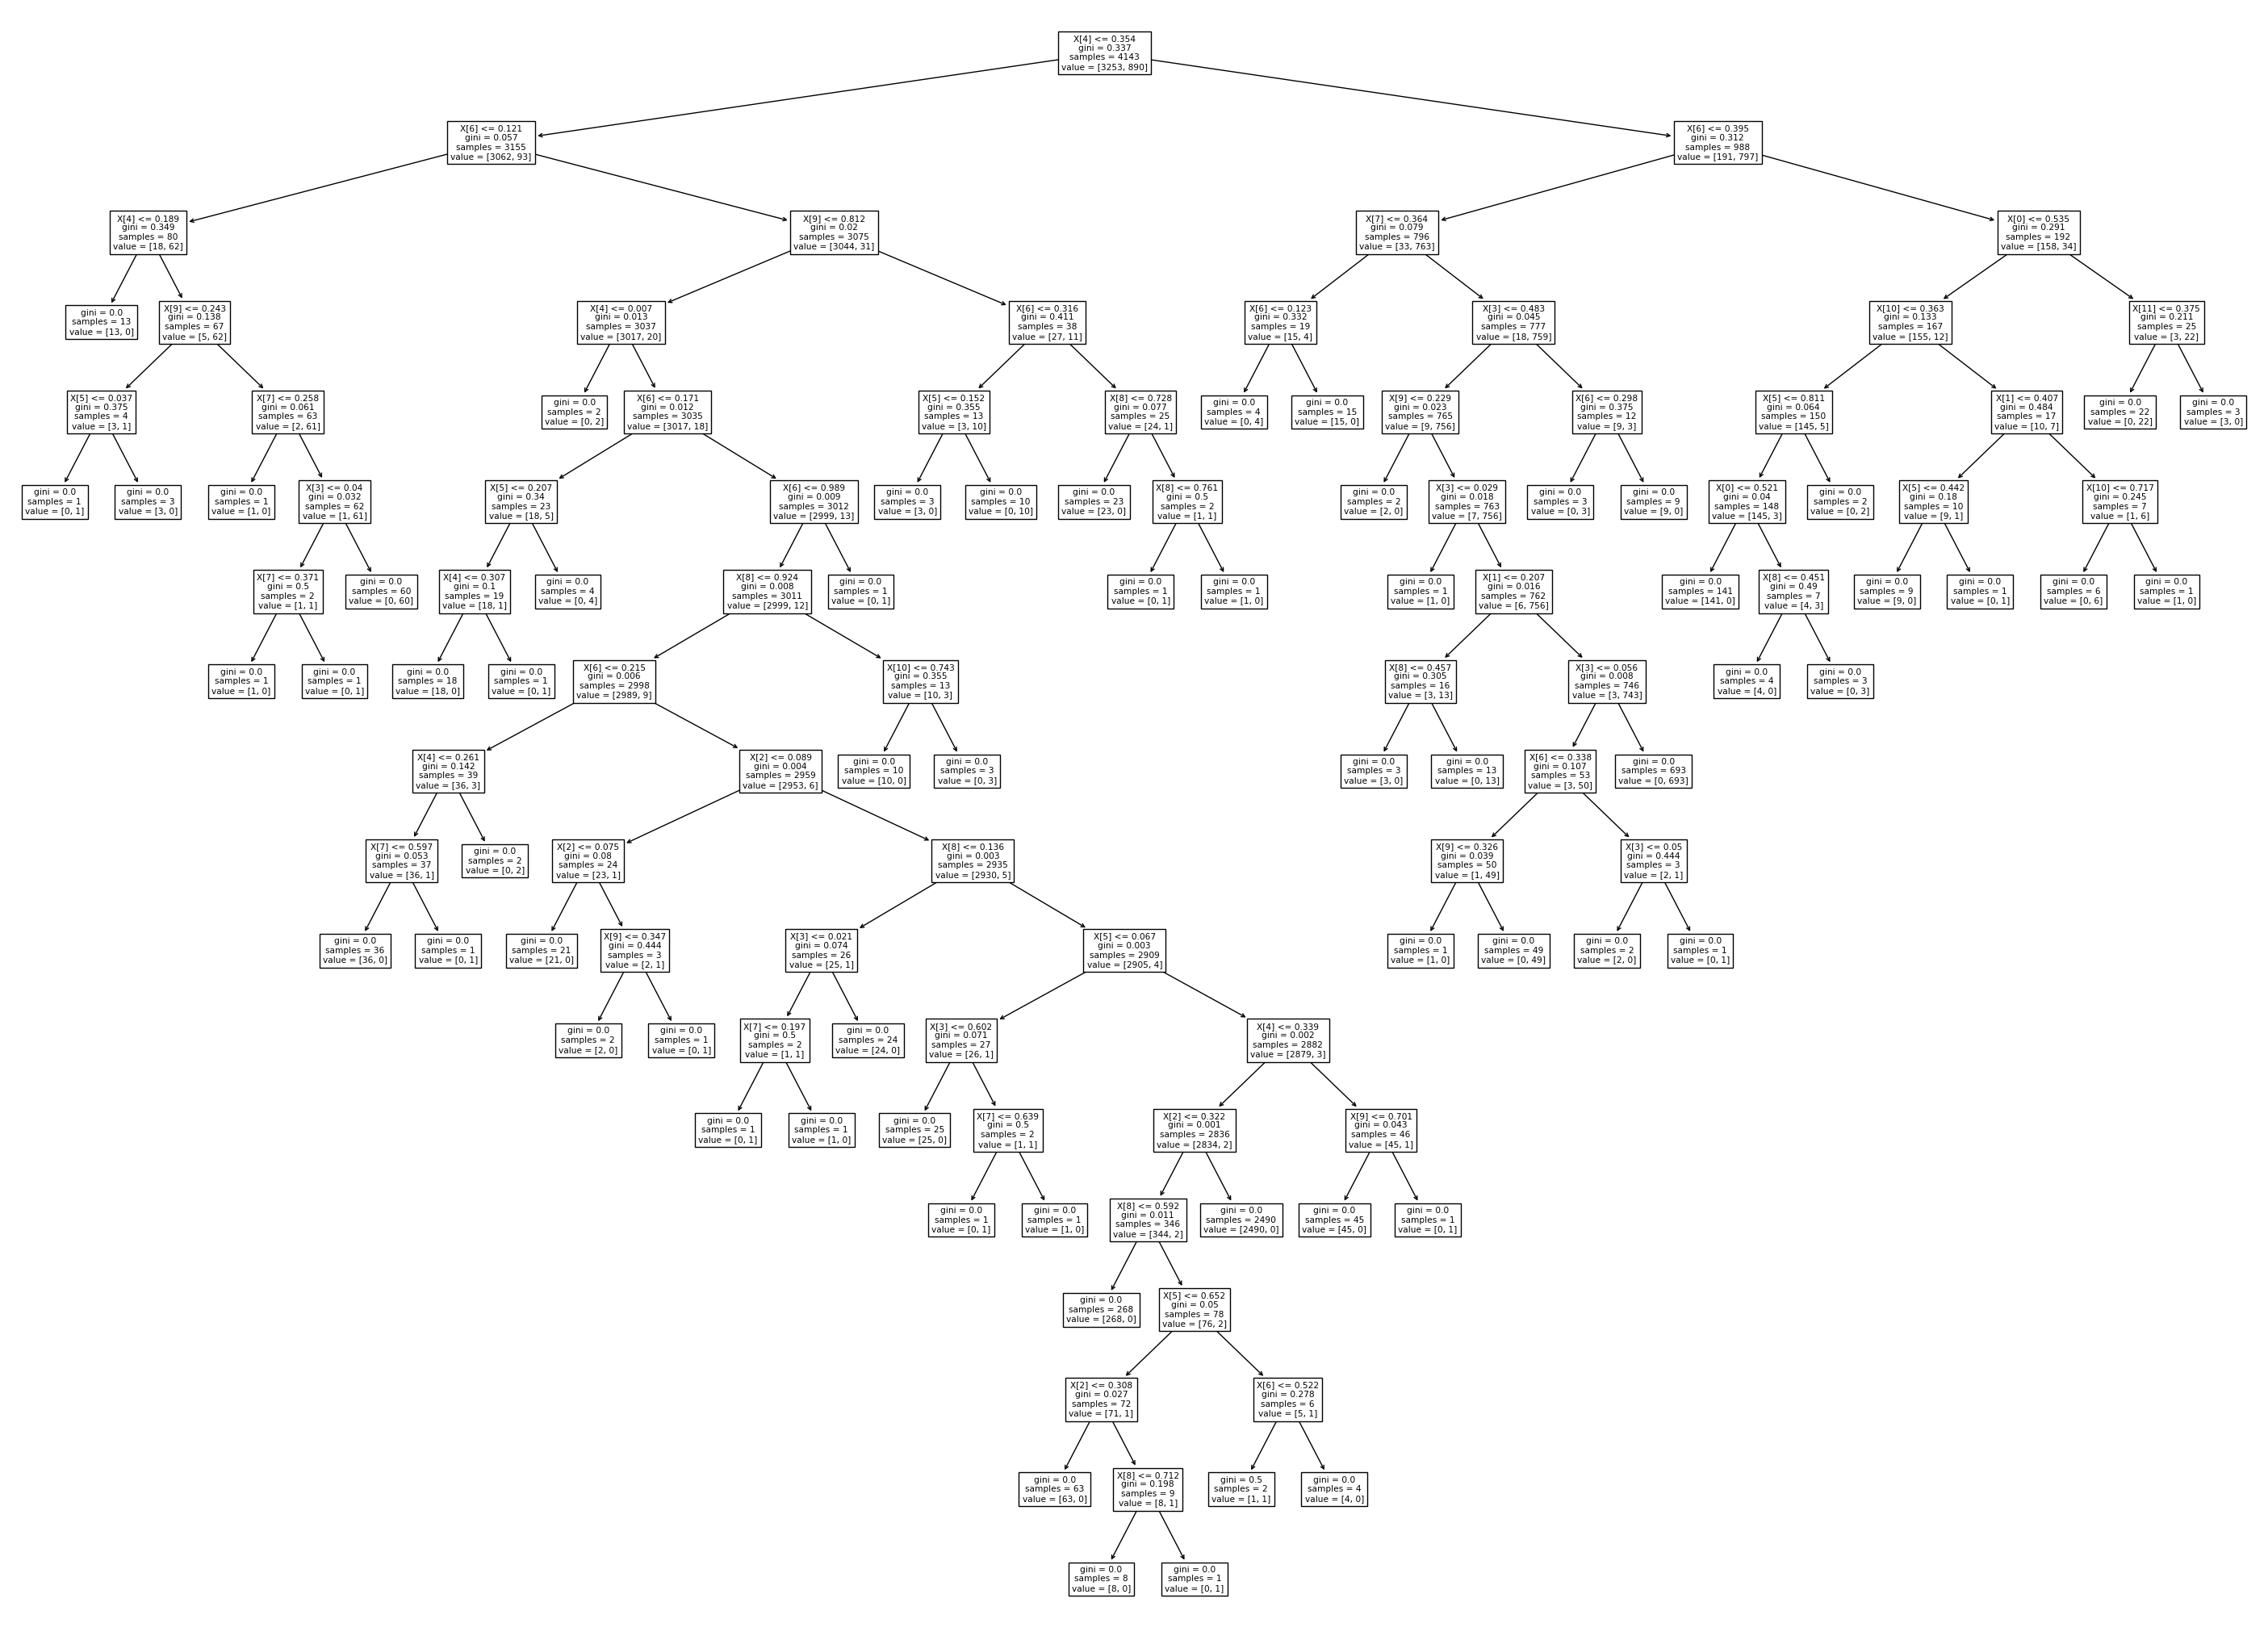

In [107]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

cohen=[]
score=[]
confusion=[]
class_out=[]
for i in range(10): 
    model=DecisionTreeClassifier()
    x=total_wine.drop(columns='wine_type')
    y=total_wine['wine_type']
    x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
    scale=MinMaxScaler()
    x_train_n= scale.fit_transform(x_train)
    x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
    x_test_n= scale.transform(x_test)
    x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=accuracy_score(pred, y_test)
    score.append(scor)

    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    i +=1
print('score :\n', np.mean(score),'\ncohen: \n',np.mean(cohen),'\nconfusion \n',confusion, 'classification: \n',class_out)
fig=plt.figure(figsize=(36,26))
plot_tree(model)

<AxesSubplot:>

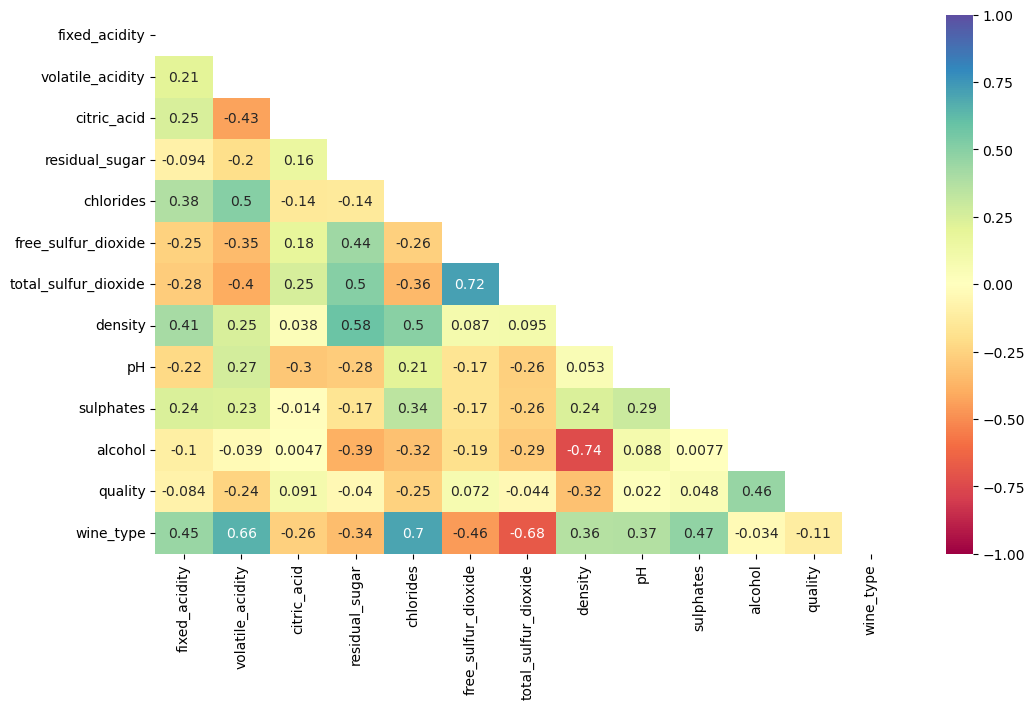

In [108]:
import seaborn as sns
cor_d=total_wine.corr()
plt.figure(figsize=(12,7))
mask=np.triu(np.ones_like(cor_d, dtype=bool))
sns.heatmap(cor_d, cmap='Spectral', annot=True, mask=mask, vmin=-1, vmax=1)


In [109]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

cohen=[]
score=[]
confusion=[]
class_out=[]
for i in range(10): 
    model=RandomForestClassifier()
    x=total_wine.drop(columns='wine_type')
    y=total_wine['wine_type']
    x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
    scale=MinMaxScaler()
    x_train_n= scale.fit_transform(x_train)
    x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
    x_test_n= scale.transform(x_test)
    x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=accuracy_score(pred, y_test)
    score.append(scor)

    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    i +=1
print('score :\n', np.mean(score),'\ncohen: \n',np.mean(cohen),'\nconfusion \n',confusion, 'classification: \n',class_out)

score :
 0.9949324324324322 
cohen: 
 0.9848563963976694 
confusion 
 [array([[1400,    1],
       [  13,  362]]), array([[1394,    1],
       [   5,  376]]), array([[1378,    6],
       [   5,  387]]), array([[1389,    2],
       [   5,  380]]), array([[1405,    1],
       [   7,  363]]), array([[1385,    2],
       [  10,  379]]), array([[1396,    1],
       [   6,  373]]), array([[1401,    4],
       [   6,  365]]), array([[1393,    0],
       [   6,  377]]), array([[1398,    0],
       [   9,  369]])] classification: 
 ['              precision    recall  f1-score   support\n\n           0       0.99      1.00      1.00      1401\n           1       1.00      0.97      0.98       375\n\n    accuracy                           0.99      1776\n   macro avg       0.99      0.98      0.99      1776\nweighted avg       0.99      0.99      0.99      1776\n', '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1395\n           1       

In [110]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

cohen=[]
score=[]
confusion=[]
class_out=[]
for i in range(10): 
    model=LinearDiscriminantAnalysis()
    x=total_wine.drop(columns='wine_type')
    y=total_wine['wine_type']
    x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
    scale=MinMaxScaler()
    x_train_n= scale.fit_transform(x_train)
    x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
    x_test_n= scale.transform(x_test)
    x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=accuracy_score(pred, y_test)
    score.append(scor)

    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    i +=1
print('score :\n', np.mean(score),'\ncohen: \n',np.mean(cohen),'\nconfusion \n',confusion, 'classification: \n',class_out)

score :
 0.9965653153153152 
cohen: 
 0.9899020189600056 
confusion 
 [array([[1360,    1],
       [   8,  407]]), array([[1379,    1],
       [   5,  391]]), array([[1363,    1],
       [   1,  411]]), array([[1390,    3],
       [   3,  380]]), array([[1413,    4],
       [   4,  355]]), array([[1394,    1],
       [   6,  375]]), array([[1385,    3],
       [   2,  386]]), array([[1386,    3],
       [   4,  383]]), array([[1385,    2],
       [   4,  385]]), array([[1395,    2],
       [   3,  376]])] classification: 
 ['              precision    recall  f1-score   support\n\n           0       0.99      1.00      1.00      1361\n           1       1.00      0.98      0.99       415\n\n    accuracy                           0.99      1776\n   macro avg       1.00      0.99      0.99      1776\nweighted avg       0.99      0.99      0.99      1776\n', '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1380\n           1       

In [111]:
from imblearn.ensemble import RUSBoostClassifier
cohen=[]
score=[]
confusion=[]
class_out=[]
for i in range(10): 
    model=RUSBoostClassifier()
    x=total_wine.drop(columns='wine_type')
    y=total_wine['wine_type']
    x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
    scale=MinMaxScaler()
    x_train_n= scale.fit_transform(x_train)
    x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
    x_test_n= scale.transform(x_test)
    x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=accuracy_score(pred, y_test)
    score.append(scor)

    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    i +=1
print('score :\n', np.mean(score),'\ncohen: \n',np.mean(cohen),'\nconfusion \n',confusion, 'classification: \n',class_out)


score :
 0.9895833333333333 
cohen: 
 0.9689974817174845 
confusion 
 [array([[1387,   11],
       [   9,  369]]), array([[1389,   20],
       [   6,  361]]), array([[1382,   17],
       [   5,  372]]), array([[1375,   13],
       [   4,  384]]), array([[1389,   18],
       [   5,  364]]), array([[1384,   11],
       [   8,  373]]), array([[1390,    6],
       [   7,  373]]), array([[1398,    6],
       [   7,  365]]), array([[1388,    7],
       [   4,  377]]), array([[1388,   17],
       [   4,  367]])] classification: 
 ['              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      1398\n           1       0.97      0.98      0.97       378\n\n    accuracy                           0.99      1776\n   macro avg       0.98      0.98      0.98      1776\nweighted avg       0.99      0.99      0.99      1776\n', '              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99      1409\n           1       

In [112]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

cohen=[]
score=[]
confusion=[]
class_out=[]
for i in range(10): 
    model=GaussianNB()
    x=total_wine.drop(columns='wine_type')
    y=total_wine['wine_type']
    x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
    scale=MinMaxScaler()
    x_train_n= scale.fit_transform(x_train)
    x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
    x_test_n= scale.transform(x_test)
    x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=accuracy_score(pred, y_test)
    score.append(scor)

    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    i +=1
print('score :\n', np.mean(score),'\ncohen: \n',np.mean(cohen),'\nconfusion \n',confusion, 'classification: \n',class_out)

score :
 0.984009009009009 
cohen: 
 0.952831389947322 
confusion 
 [array([[1374,   23],
       [   8,  371]]), array([[1368,   17],
       [  15,  376]]), array([[1362,   29],
       [   7,  378]]), array([[1384,    8],
       [   9,  375]]), array([[1383,   21],
       [   9,  363]]), array([[1402,   16],
       [  16,  342]]), array([[1366,   21],
       [   9,  380]]), array([[1385,   17],
       [   7,  367]]), array([[1375,   14],
       [  10,  377]]), array([[1376,   23],
       [   5,  372]])] classification: 
 ['              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.99      1397\n           1       0.94      0.98      0.96       379\n\n    accuracy                           0.98      1776\n   macro avg       0.97      0.98      0.97      1776\nweighted avg       0.98      0.98      0.98      1776\n', '              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      1385\n           1       0.

In [113]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

cohen=[]
score=[]
confusion=[]
class_out=[]
for i in range(10): 
    model=KNeighborsClassifier()
    x=total_wine.drop(columns='wine_type')
    y=total_wine['wine_type']
    x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
    scale=MinMaxScaler()
    x_train_n= scale.fit_transform(x_train)
    x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
    x_test_n= scale.transform(x_test)
    x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=accuracy_score(pred, y_test)
    score.append(scor)

    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    i +=1
print('score :\n', np.mean(score),'\ncohen: \n',np.mean(cohen),'\nconfusion \n',confusion, 'classification: \n',class_out)

score :
 0.99375 
cohen: 
 0.9813050433310961 
confusion 
 [array([[1380,    4],
       [   6,  386]]), array([[1402,    3],
       [   5,  366]]), array([[1406,    5],
       [   8,  357]]), array([[1388,    3],
       [   6,  379]]), array([[1369,    6],
       [   6,  395]]), array([[1388,    1],
       [  13,  374]]), array([[1393,    5],
       [   6,  372]]), array([[1414,    3],
       [  10,  349]]), array([[1411,    1],
       [   6,  358]]), array([[1384,    5],
       [   9,  378]])] classification: 
 ['              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1384\n           1       0.99      0.98      0.99       392\n\n    accuracy                           0.99      1776\n   macro avg       0.99      0.99      0.99      1776\nweighted avg       0.99      0.99      0.99      1776\n', '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1405\n           1       0.99      0

In [114]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cohen=[]
score=[]
confusion=[]
class_out=[]
for i in range(10): 
    model=SVC()
    x=total_wine.drop(columns='wine_type')
    y=total_wine['wine_type']
    x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
    scale=MinMaxScaler()
    x_train_n= scale.fit_transform(x_train)
    x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
    x_test_n= scale.transform(x_test)
    x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=accuracy_score(pred, y_test)
    score.append(scor)

    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    i +=1
print('score :\n', np.mean(score),'\ncohen: \n',np.mean(cohen),'\nconfusion \n',confusion, 'classification: \n',class_out)

score :
 0.996677927927928 
cohen: 
 0.9900162973726669 
confusion 
 [array([[1395,    0],
       [   2,  379]]), array([[1394,    0],
       [   4,  378]]), array([[1391,    1],
       [   3,  381]]), array([[1420,    0],
       [   4,  352]]), array([[1395,    1],
       [   4,  376]]), array([[1385,    0],
       [   9,  382]]), array([[1385,    1],
       [   7,  383]]), array([[1391,    1],
       [   3,  381]]), array([[1411,    3],
       [   5,  357]]), array([[1407,    4],
       [   7,  358]])] classification: 
 ['              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1395\n           1       1.00      0.99      1.00       381\n\n    accuracy                           1.00      1776\n   macro avg       1.00      1.00      1.00      1776\nweighted avg       1.00      1.00      1.00      1776\n', '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1394\n           1       1

In [115]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

cohen=[]
score=[]
confusion=[]
class_out=[]
for i in range(10): 
    model=AdaBoostClassifier()
    x=total_wine.drop(columns='wine_type')
    y=total_wine['wine_type']
    x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
    scale=MinMaxScaler()
    x_train_n= scale.fit_transform(x_train)
    x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
    x_test_n= scale.transform(x_test)
    x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=accuracy_score(pred, y_test)
    score.append(scor)

    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    i +=1
print('score :\n', np.mean(score),'\ncohen: \n',np.mean(cohen),'\nconfusion \n',confusion, 'classification: \n',class_out)

score :
 0.9938063063063064 
cohen: 
 0.9816169172851268 
confusion 
 [array([[1402,    8],
       [   6,  360]]), array([[1395,    6],
       [   6,  369]]), array([[1406,    6],
       [   2,  362]]), array([[1398,    2],
       [   3,  373]]), array([[1377,    3],
       [  13,  383]]), array([[1383,    8],
       [   6,  379]]), array([[1430,    5],
       [   2,  339]]), array([[1365,    2],
       [   9,  400]]), array([[1373,    3],
       [  10,  390]]), array([[1385,    6],
       [   4,  381]])] classification: 
 ['              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00      1410\n           1       0.98      0.98      0.98       366\n\n    accuracy                           0.99      1776\n   macro avg       0.99      0.99      0.99      1776\nweighted avg       0.99      0.99      0.99      1776\n', '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1401\n           1       

In [116]:
# The scoring can be‘accuracy’, ‘balanced_accuracy’, ‘roc_auc’ ,‘f1’, ‘neg_mean_absolute_error’ (= -sigma(|y-yp])/n, y is observation and yp is prediction), ‘neg_root_mean_squared_error’, ‘r2’
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier as xgb
x=total_wine.drop(columns='wine_type')
y=total_wine['wine_type']
x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
scale=MinMaxScaler()
x_train_n= scale.fit_transform(x_train)
x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
x_test_n= scale.transform(x_test)
x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
models=[]
models.append(('ADA', AdaBoostClassifier()))
models.append(('svc', SVC()))
models.append(('LGR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('Gu', GaussianNB()))
models.append(('xgb', xgb()))

#models.append(('kNN', KNeighborsClassifier()))

results=[]
names=[]
for name, model in models:
    kf=KFold(n_splits=10, random_state=7, shuffle=True)
    cv_result=cross_val_score(model, x_train_n, y_train,cv=kf, scoring='f1')
    results.append(cv_result)
    names.append(name)
    print(name, '%0.4f'%np.mean(cv_result), '%0.4f'%np.std(cv_result))

ADA 0.9833 0.0105
svc 0.9908 0.0071
LGR 0.9858 0.0082
DT 0.9615 0.0143
RF 0.9861 0.0084
LDA 0.9927 0.0051
Gu 0.9631 0.0110
[22:34:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:34:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:34:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:34:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

In [117]:
# The scoring can be‘accuracy’, ‘balanced_accuracy’, ‘roc_auc’ ,‘f1’, ‘neg_mean_absolute_error’ (= -sigma(|y-yp])/n, y is observation and yp is prediction), ‘neg_root_mean_squared_error’, ‘r2’
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
x=total_wine.drop(columns='wine_type')
y=total_wine['wine_type']
x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
scale=MinMaxScaler()
x_train_n= scale.fit_transform(x_train)
x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
x_test_n= scale.transform(x_test)
x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
models=[]
models.append(('ADA', AdaBoostClassifier()))
models.append(('svc', SVC()))
models.append(('LGR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('Gu', GaussianNB()))
models.append(('kNN', KNeighborsClassifier()))

results=[]
names=[]
for name, model in models:
    kf=StratifiedKFold(n_splits=10, random_state=7, shuffle=True)
    cv_result=cross_val_score(model, x_train_n, y_train,cv=kf, scoring='f1')
    results.append(cv_result)
    names.append(name)
    print(name, '%0.4f'%np.mean(cv_result), '%0.4f'%np.std(cv_result))
  

ADA 0.9846 0.0077
svc 0.9928 0.0050
LGR 0.9851 0.0083
DT 0.9607 0.0132
RF 0.9878 0.0083
LDA 0.9928 0.0066
Gu 0.9598 0.0160
kNN 0.9851 0.0075


In [127]:
np.bincount(y_test)

array([1418,  358])

ABC 0.9843 0.0099
SVC 0.9899 0.0083
LR 0.9871 0.0075
DTC 0.9590 0.0146
RFC 0.9876 0.0075
LDA 0.9916 0.0052
GNB 0.9665 0.0141
[22:35:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the obje

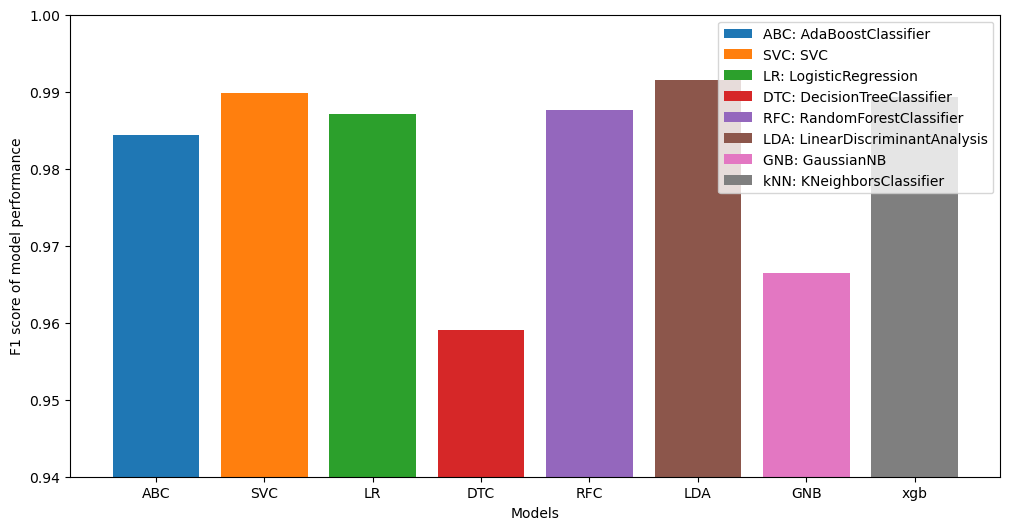

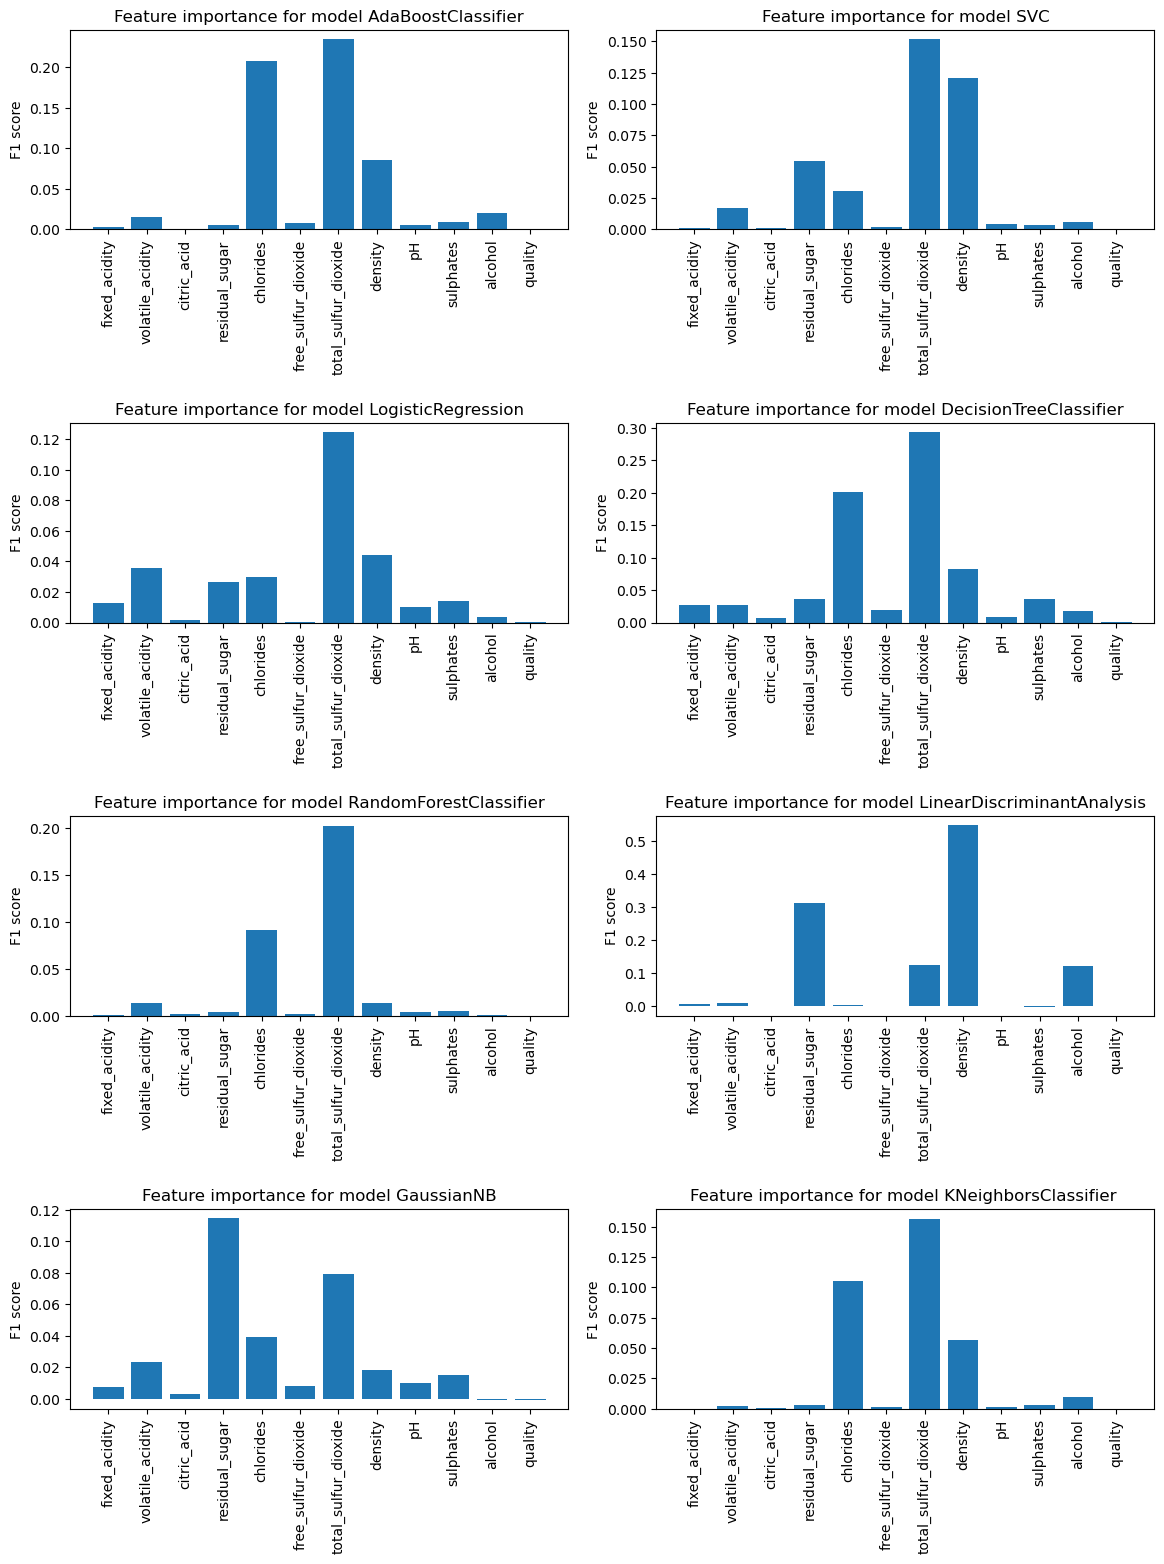

In [118]:
# The scoring can be‘accuracy’, ‘balanced_accuracy’, ‘roc_auc’ ,‘f1’, ‘neg_mean_absolute_error’ (= -sigma(|y-yp])/n, y is observation and yp is prediction), 
# ‘neg_root_mean_squared_error’, ‘r2’
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
x=total_wine.drop(columns='wine_type')
y=total_wine['wine_type']
x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
scale=MinMaxScaler()
x_train_n= scale.fit_transform(x_train)
x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
x_test_n= scale.transform(x_test)
x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
models=[]
models.append(('ABC', AdaBoostClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
#models.append(('kNN', KNeighborsClassifier()))
models.append(('xgb', xgb()))

results=[]
names=[]
importance_f=[]
fig= plt.figure(figsize=(12,6))

for name, model in models:
    kf=StratifiedKFold(n_splits=10, random_state=7, shuffle=True)
    cv_result=cross_val_score(model, x_train_n, y_train,cv=kf, scoring='f1')
    results.append(cv_result)
    names.append(name)
    print(name, '%0.4f'%np.mean(cv_result), '%0.4f'%np.std(cv_result))

    plt.bar(name,np.mean(cv_result))
    plt.ylim(0.94,1)
    model.fit(x_train_n, y_train)
    re=permutation_importance(model, x_train_n,y_train, scoring='f1')
    importance = re.importances_mean
    importance_f.append(importance)

plt.legend(labels=['ABC: AdaBoostClassifier', 'SVC: SVC','LR: LogisticRegression', 'DTC: DecisionTreeClassifier',
'RFC: RandomForestClassifier', 'LDA: LinearDiscriminantAnalysis', 'GNB: GaussianNB', 'kNN: KNeighborsClassifier '])
plt.xlabel('Models')
plt.ylabel('F1 score of model performance')

plt.show()
count=0
fig= plt.figure(figsize=(12,16))
labels=['AdaBoostClassifier', 'SVC','LogisticRegression', 'DecisionTreeClassifier',
'RandomForestClassifier', 'LinearDiscriminantAnalysis', 'GaussianNB', 'KNeighborsClassifier ']
for i in range(4):
    for j in range(2):
        plt.subplot2grid((4,2),(i,j))
        plt.bar([x for x in x_train_n.columns], importance_f[count])
        plt.tight_layout(pad=2)
        plt.title('Feature importance for model {}'.format(labels[count]))

        plt.ylabel('F1 score')
        plt.xticks(rotation=90)
        count +=1

ABC 0.9868 0.0103
SVC 0.9912 0.0062
LR 0.9846 0.0092
DTC 0.9709 0.0162
RFC 0.9895 0.0076
LDA 0.9890 0.0065
GNB 0.9694 0.0126
[22:35:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the obje

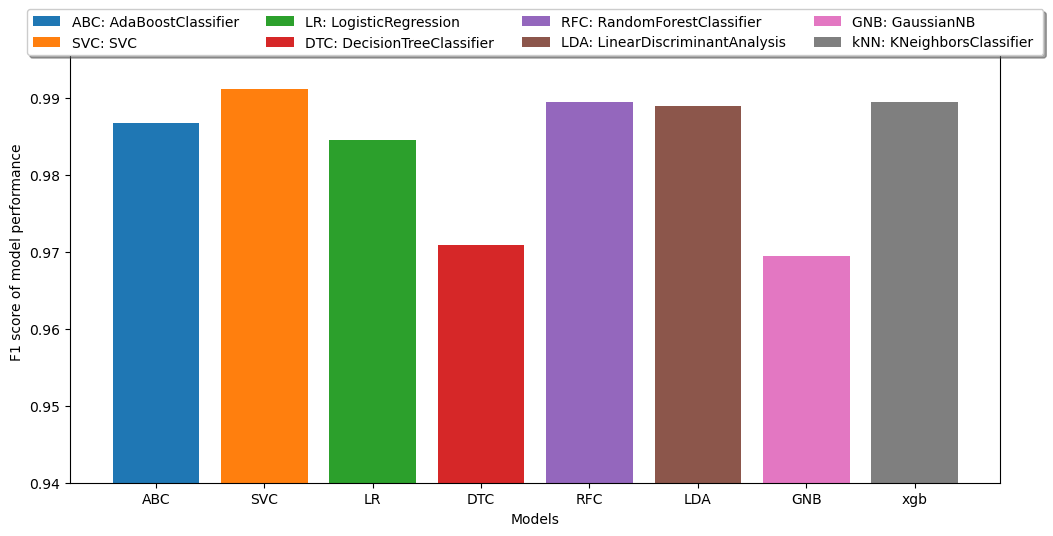

[0.9859175032113802, 0.9929438687941008, 0.9806161246537176, 0.9398958449459317, 0.9733422992867264, 0.9929735717676847, 0.954519667170953, 0.980575110368691] %
 [array([[1417,    3],
       [   5,  351]]), array([[1420,    0],
       [   4,  352]]), array([[1416,    4],
       [   7,  349]]), array([[1406,   14],
       [  20,  336]]), array([[1418,    2],
       [  13,  343]]), array([[1418,    2],
       [   2,  354]]), array([[1405,   15],
       [  11,  345]]), array([[1417,    3],
       [   8,  348]])]


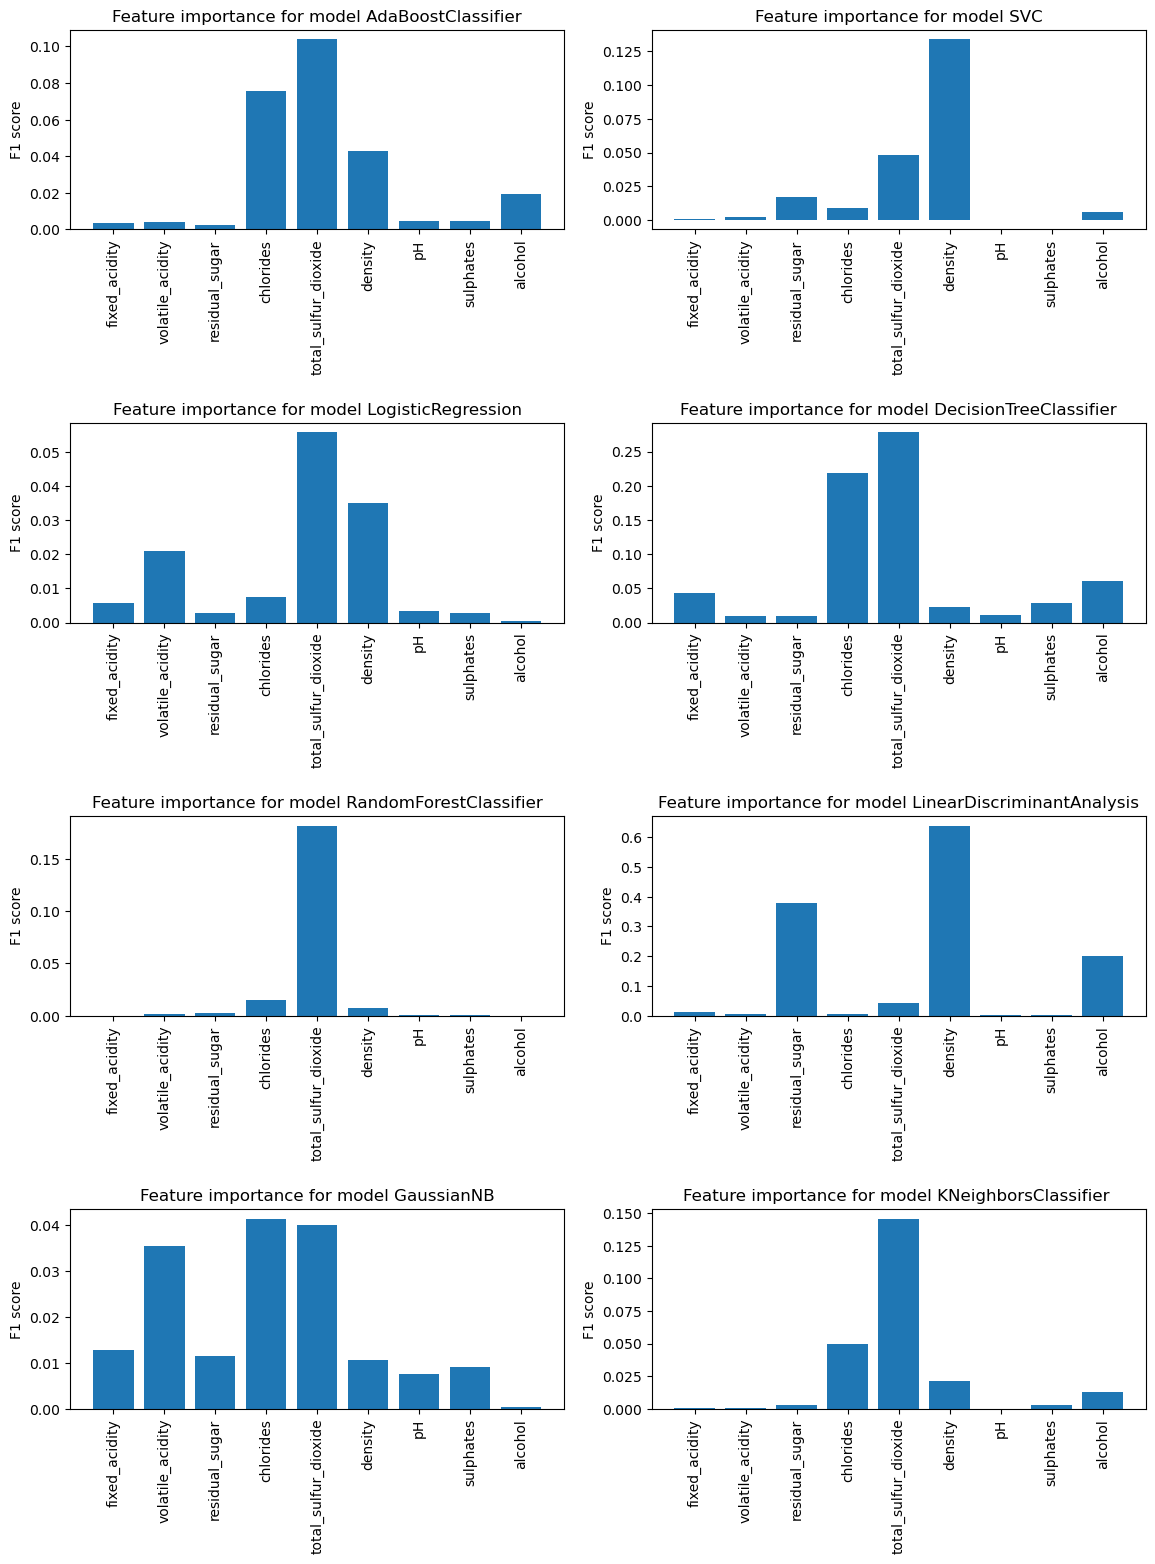

In [119]:
# I will remove  'citric_acid','quality','free_sulfur_dioxide', (based n above importance figures)
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
x=total_wine.drop(columns=['wine_type','citric_acid','quality','free_sulfur_dioxide'])
y=total_wine['wine_type']
x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
scale=MinMaxScaler()
x_train_n= scale.fit_transform(x_train)
x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
x_test_n= scale.transform(x_test)
x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
models=[]
models.append(('ABC', AdaBoostClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
#models.append(('kNN', KNeighborsClassifier()))
models.append(('xgb', xgb()))

cohen=[]
score=[]
confusion=[]
class_out=[]
results=[]
names=[]
importance_f=[]
fig= plt.figure(figsize=(12,6))

for name, model in models:
    kf=StratifiedKFold(n_splits=10, random_state=7, shuffle=True)
    cv_result=cross_val_score(model, x_train_n, y_train,cv=kf, scoring='f1')
    results.append(cv_result)
    names.append(name)
    print(name, '%0.4f'%np.mean(cv_result), '%0.4f'%np.std(cv_result))
    plt.bar(name,np.mean(cv_result))
    plt.ylim(0.94,1)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=f1_score(pred, y_test, average='macro')
    score.append(scor)
    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    re=permutation_importance(model, x_train_n,y_train, scoring='precision')
    importance = re.importances_mean
    importance_f.append(importance)

plt.legend(labels=['ABC: AdaBoostClassifier', 'SVC: SVC','LR: LogisticRegression', 'DTC: DecisionTreeClassifier',
'RFC: RandomForestClassifier', 'LDA: LinearDiscriminantAnalysis', 'GNB: GaussianNB', 'kNN: KNeighborsClassifier '], 
loc='upper center', bbox_to_anchor=(0.5, 1.04), fancybox=True, shadow=True, ncol=4)

plt.xlabel('Models')
plt.ylabel('F1 score of model performance')

plt.show()
count=0
fig= plt.figure(figsize=(12,16))
labels=['AdaBoostClassifier', 'SVC','LogisticRegression', 'DecisionTreeClassifier',
'RandomForestClassifier', 'LinearDiscriminantAnalysis', 'GaussianNB', 'KNeighborsClassifier ']
for i in range(4):
    for j in range(2):
        plt.subplot2grid((4,2),(i,j))
        plt.bar([x for x in x_train_n.columns], importance_f[count])
        plt.tight_layout(pad=2)
        plt.title('Feature importance for model {}'.format(labels[count]))

        plt.ylabel('F1 score')
        plt.xticks(rotation=90)
        count +=1
print(cohen, '%\n', confusion)

In [120]:
x_train_n

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.375000,0.226667,0.708995,0.419580,0.577206,0.767592,0.855556,0.347222,0.250000
1,0.361111,0.186667,0.391534,0.307692,0.698529,0.567463,0.488889,0.361111,0.125000
2,0.347222,0.346667,0.026455,0.272727,0.286765,0.360878,0.466667,0.222222,0.250000
3,0.347222,0.193333,0.084656,0.741259,0.360294,0.302776,0.500000,0.500000,0.660714
4,0.500000,0.440000,0.751323,0.314685,0.617647,0.766301,0.433333,0.375000,0.232143
...,...,...,...,...,...,...,...,...,...
4138,0.291667,0.160000,0.052910,0.986014,0.176471,0.360878,0.366667,0.347222,0.250000
4139,0.472222,0.440000,0.063492,0.160839,0.250000,0.114913,0.188889,0.180556,0.821429
4140,0.388889,0.266667,0.439153,0.272727,0.386029,0.480310,0.511111,0.444444,0.464286
4141,0.361111,0.386667,0.084656,0.167832,0.371324,0.118141,0.477778,0.430556,0.910714


In [121]:
# this is another feature selection based on ANoVa test (here I select the five best features)
# this method gives most relaible features which can be used in any algorithems
from sklearn.feature_selection import f_classif, SelectKBest
df_n=pd.DataFrame(f_classif(x_train_n, y_train), columns=x_train_n.columns, index=['f','p'])
select_b=SelectKBest(f_classif, k=6)
m=select_b.fit_transform(x_train_n, y_train)
print(m)
df_n

[[0.375      0.22666667 0.41958042 0.57720588 0.76759199 0.34722222]
 [0.36111111 0.18666667 0.30769231 0.69852941 0.56746288 0.36111111]
 [0.34722222 0.34666667 0.27272727 0.28676471 0.36087799 0.22222222]
 ...
 [0.38888889 0.26666667 0.27272727 0.38602941 0.48030988 0.44444444]
 [0.36111111 0.38666667 0.16783217 0.37132353 0.11814074 0.43055556]
 [0.18055556 0.17333333 0.27272727 0.20220588 0.15622983 0.20833333]]


,fixed_acidity,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol
f,1.079240e+03,3195.747463,5.168796e+02,4138.010271,3764.591562,6.678897e+02,6.416927e+02,1.157620e+03,11.101005
p,1.491119e-210,0.000000,6.346257e-108,0.000000,0.000000,1.158714e-136,9.624421e-132,5.761952e-224,0.000870


ABC 0.9874 0.0053
SVC 0.9923 0.0041
LR 0.9898 0.0062
DTC 0.9707 0.0088
RFC 0.9908 0.0058
LDA 0.9894 0.0055
GNB 0.9746 0.0090
[22:35:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the obje

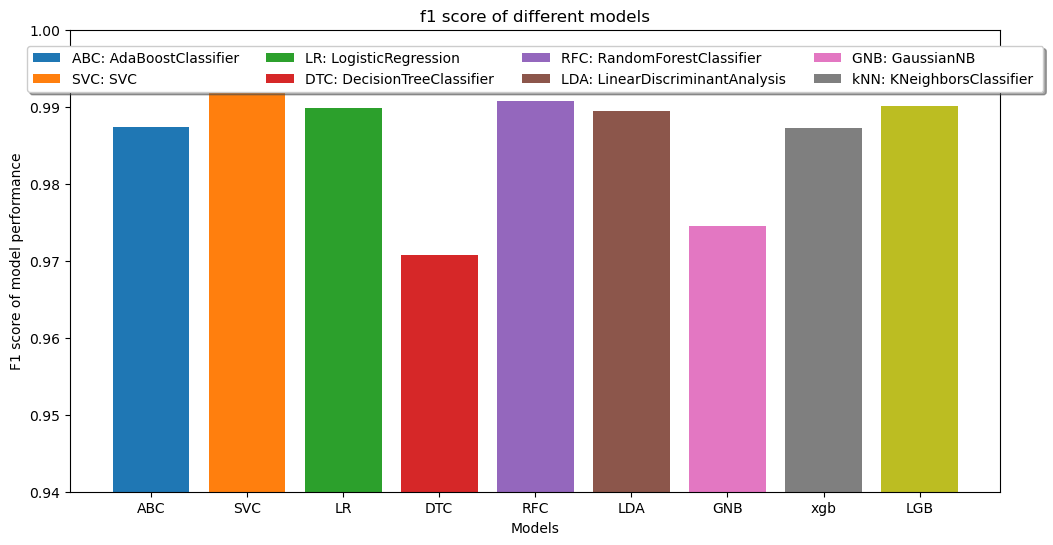

ABC 0.9874 0.0053
SVC 0.9923 0.0041
LR 0.9898 0.0062
DTC 0.9732 0.0085
RFC 0.9908 0.0068
LDA 0.9894 0.0055
GNB 0.9746 0.0090
[22:36:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the obje

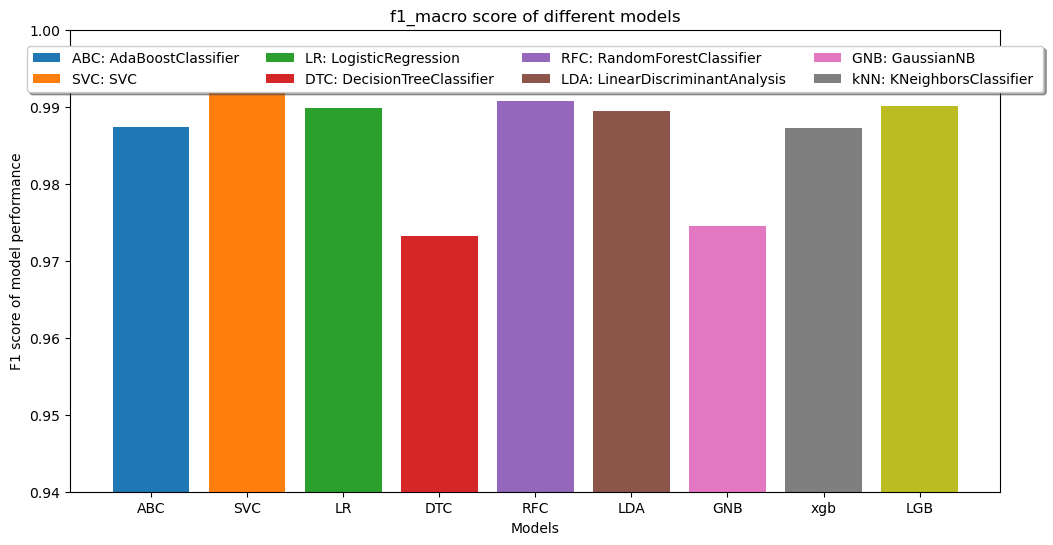

ABC 0.9874 0.0053
SVC 0.9923 0.0041
LR 0.9898 0.0062
DTC 0.9724 0.0101
RFC 0.9908 0.0058
LDA 0.9894 0.0055
GNB 0.9746 0.0090
[22:36:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the obje

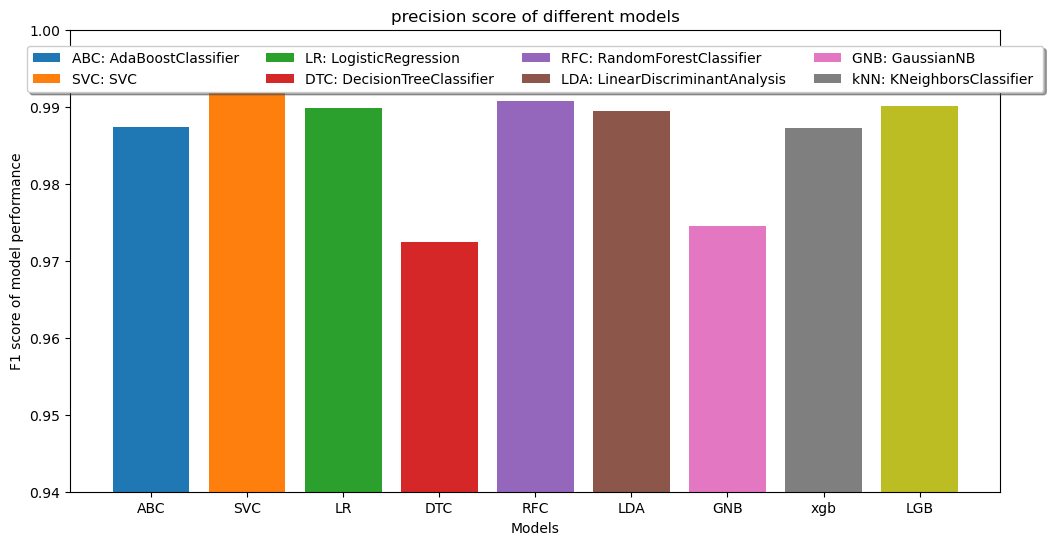

ABC 0.9874 0.0053
SVC 0.9923 0.0041
LR 0.9898 0.0062
DTC 0.9728 0.0080
RFC 0.9905 0.0045
LDA 0.9894 0.0055
GNB 0.9746 0.0090
[22:37:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the obje

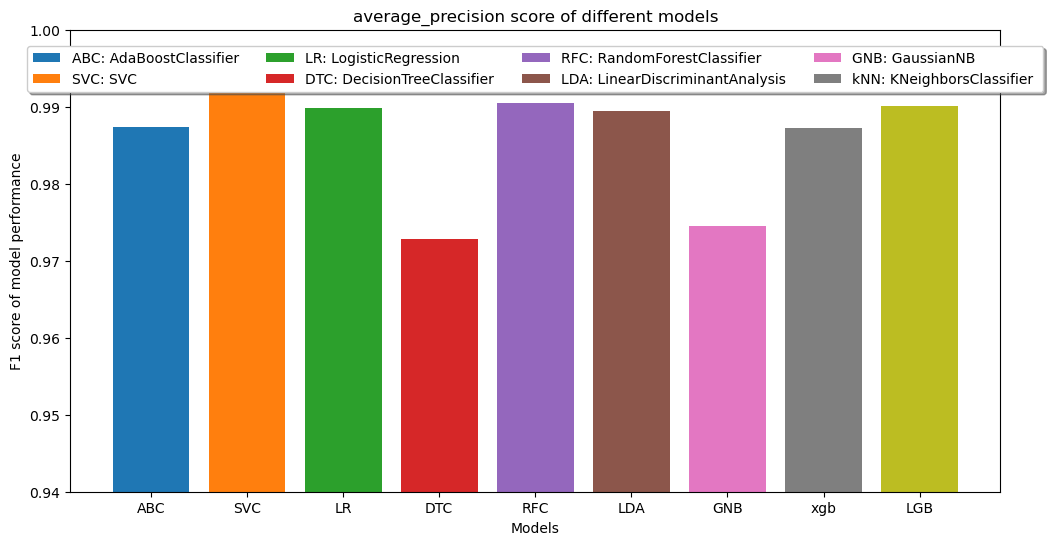

ABC 0.9874 0.0053
SVC 0.9923 0.0041
LR 0.9898 0.0062
DTC 0.9707 0.0094
RFC 0.9908 0.0058
LDA 0.9894 0.0055
GNB 0.9746 0.0090
[22:37:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the obje

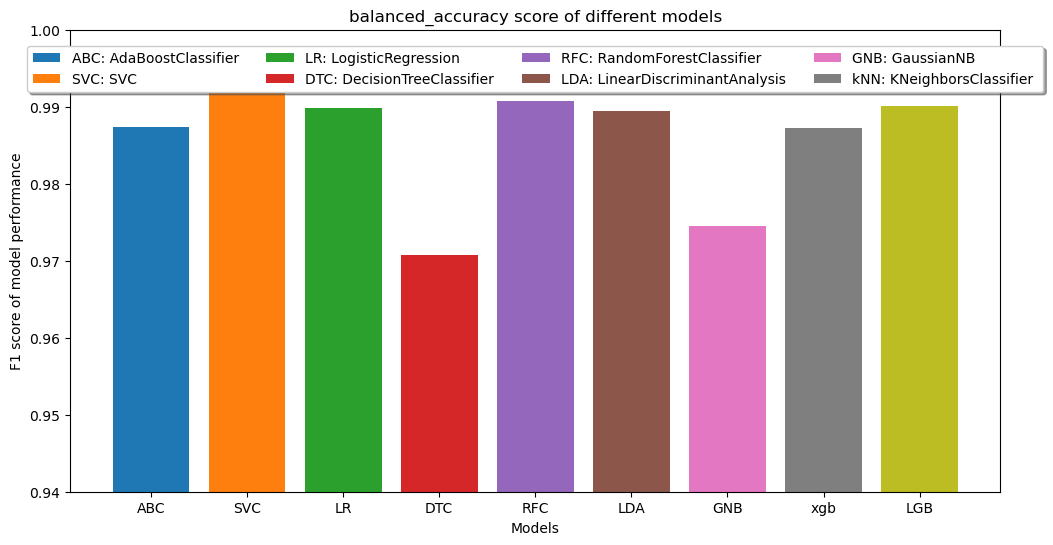

ABC 0.9874 0.0053
SVC 0.9923 0.0041
LR 0.9898 0.0062
DTC 0.9714 0.0074
RFC 0.9905 0.0059
LDA 0.9894 0.0055
GNB 0.9746 0.0090
[22:37:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the obje

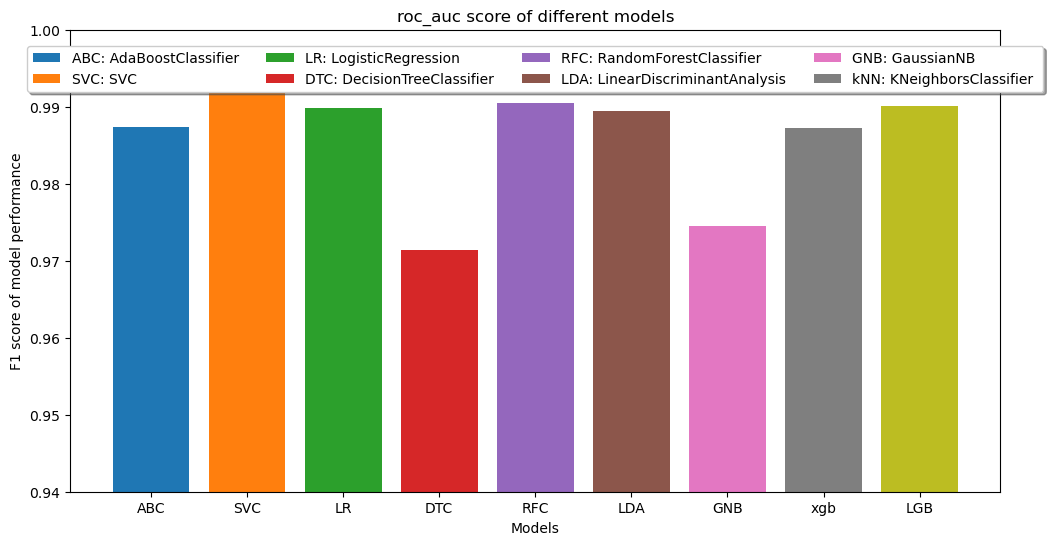

ABC 0.9874 0.0053
SVC 0.9923 0.0041
LR 0.9898 0.0062
DTC 0.9717 0.0090
RFC 0.9919 0.0050
LDA 0.9894 0.0055
GNB 0.9746 0.0090
[22:38:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:38:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:38:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:38:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the obje

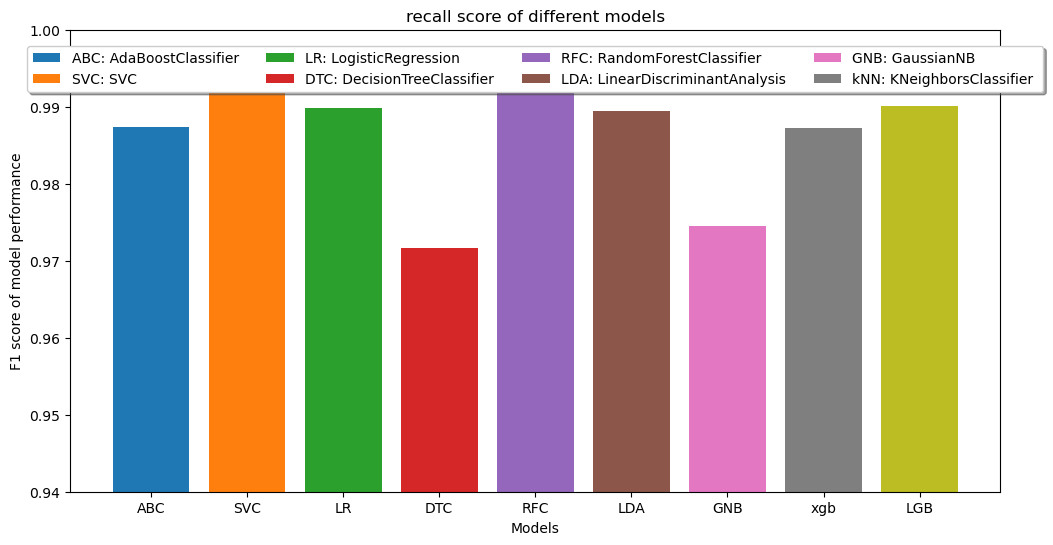

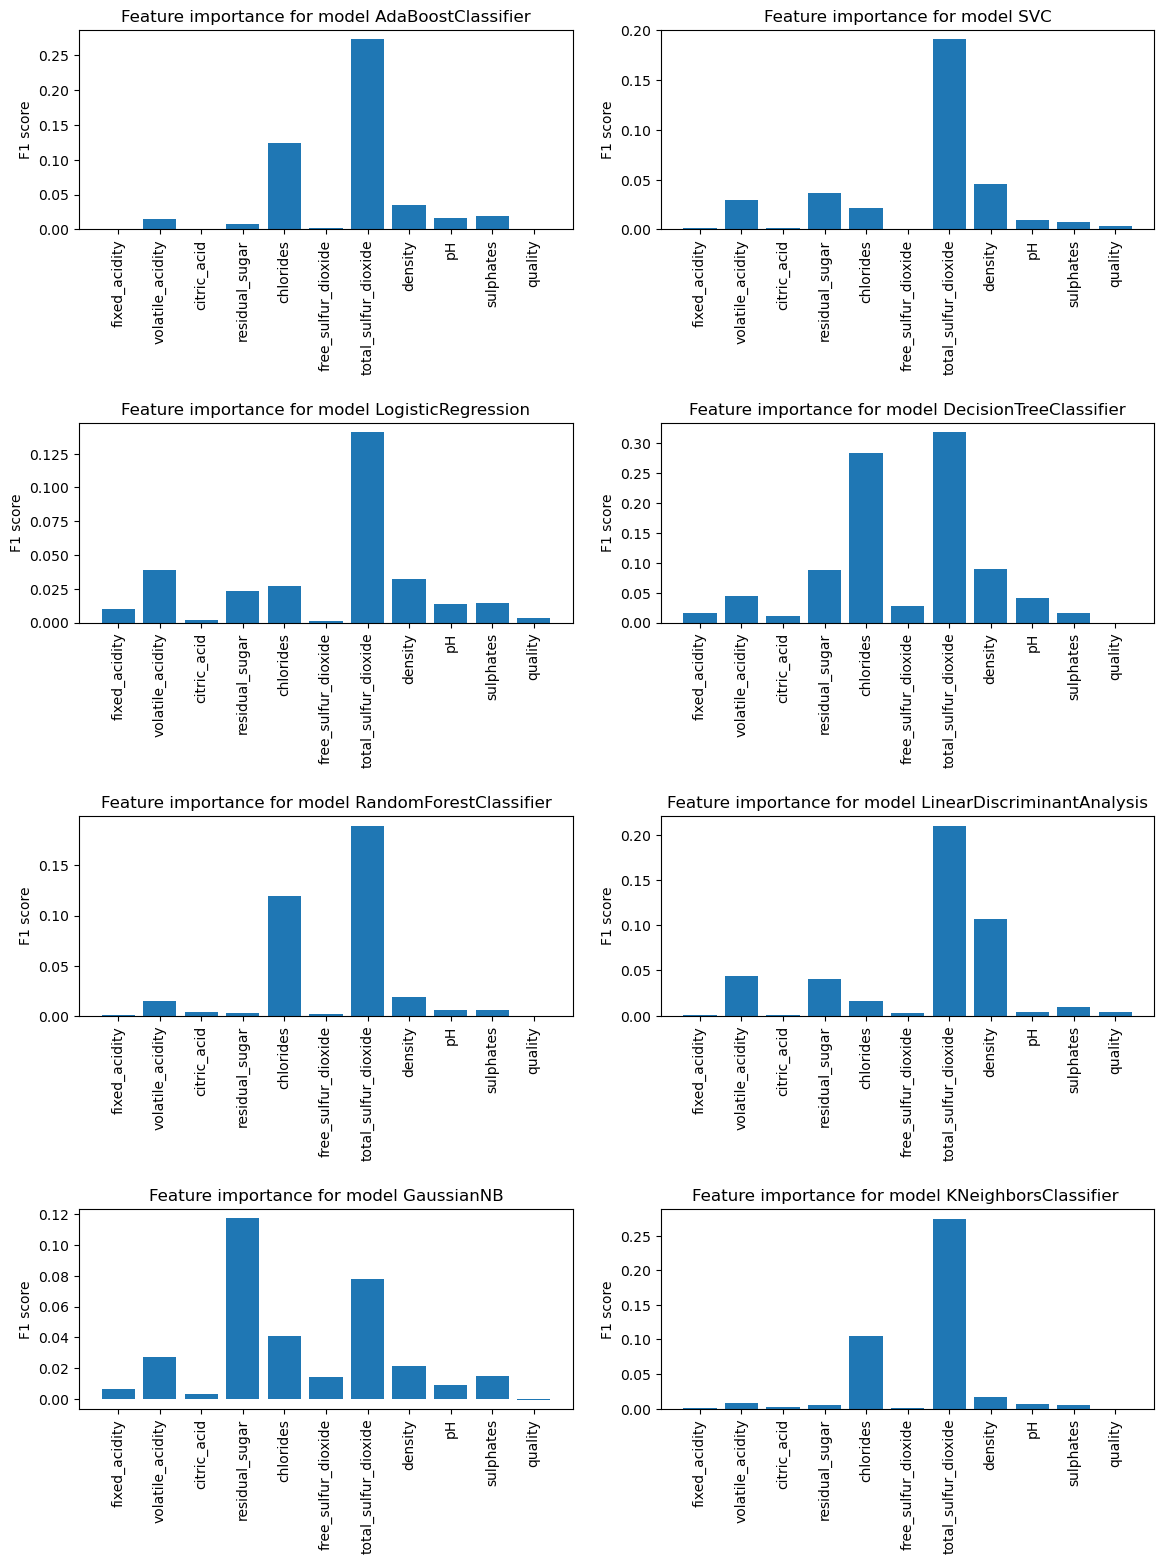

In [122]:
# Baesd on ANOVA test alcohol has no effect on wine type
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from xgboost import XGBClassifier as xgb
from lightgbm import LGBMClassifier as LighGB



x=total_wine.drop(columns=['wine_type','alcohol'])
y=total_wine['wine_type']
x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
scale=MinMaxScaler()
x_train_n= scale.fit_transform(x_train)
x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
x_test_n= scale.transform(x_test)
x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
models=[]
models.append(('ABC', AdaBoostClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
models.append(('xgb', xgb()))
models.append(('LGB', LighGB()))


#models.append(('kNN', KNeighborsClassifier()))
cohen=[]
score=[]
confusion=[]
class_out=[]
results=[]
names=[]
importance_f=[]
count=0
sco=['f1','f1_macro', 'precision','average_precision', 'balanced_accuracy', 'roc_auc' , 'recall']
for i in sco:
    fig= plt.figure(figsize=(12,6))
    for name, model in models:
        kf=StratifiedKFold(n_splits=10, random_state=7, shuffle=True)
        cv_result=cross_val_score(model, x_train_n, y_train,cv=kf, scoring= make_scorer(f1_score, average='macro'))
        results.append(cv_result)
        names.append(name)
        print(name, '%0.4f'%np.mean(cv_result), '%0.4f'%np.std(cv_result))

        plt.bar(name,np.mean(cv_result))
        plt.ylim(0.94,1)
        model.fit(x_train_n, y_train)
        pred=model.predict(x_test_n)
        re=permutation_importance(model, x_train_n,y_train, scoring=i)
        importance = re.importances_mean
        importance_f.append(importance)
        scor=accuracy_score(pred, y_test)
        score.append(scor)

        con=confusion_matrix(y_test, pred)
        confusion.append(con)
        confusion.append('end')
        class_p= classification_report(y_test,pred)
        class_out.append(class_p)
        cohe=cohen_kappa_score(y_test, pred)
        cohen.append(cohe)
    plt.legend(labels=['ABC: AdaBoostClassifier', 'SVC: SVC','LR: LogisticRegression', 'DTC: DecisionTreeClassifier',
'RFC: RandomForestClassifier', 'LDA: LinearDiscriminantAnalysis', 'GNB: GaussianNB', 'kNN: KNeighborsClassifier '], 
loc='upper center', bbox_to_anchor=(0.5, 0.98), fancybox=True, shadow=True, ncol=4)
    plt.title('{} score of different models'.format(i))
    plt.xlabel('Models')
    plt.ylabel('F1 score of model performance')
    plt.show()


count=0
fig= plt.figure(figsize=(12,16))
labels=['AdaBoostClassifier', 'SVC','LogisticRegression', 'DecisionTreeClassifier',
'RandomForestClassifier', 'LinearDiscriminantAnalysis', 'GaussianNB', 'KNeighborsClassifier ']
for i in range(4):
    for j in range(2):
        plt.subplot2grid((4,2),(i,j))
        plt.bar([x for x in x_train_n.columns], importance_f[count])
        plt.tight_layout(pad=2)
        plt.title('Feature importance for model {}'.format(labels[count]))

        plt.ylabel('F1 score')
        plt.xticks(rotation=90)
        count +=1

The mean and std are: 0.98317, 0.00910
The mean and std are: 0.98613, 0.00804
The mean and std are: 0.98558, 0.00847
The mean and std are: 0.98643, 0.00656
The mean and std are: 0.98543, 0.00847
The mean and std are: 0.98647, 0.00751
The mean and std are: 0.98562, 0.00817
The mean and std are: 0.98604, 0.00851
The mean and std are: 0.98627, 0.00814
The mean and std are: 0.98605, 0.00802
The mean and std are: 0.98590, 0.00850
The mean and std are: 0.98574, 0.00849
The mean and std are: 0.98588, 0.00837
The mean and std are: 0.98577, 0.00860
The mean and std are: 0.98550, 0.00881


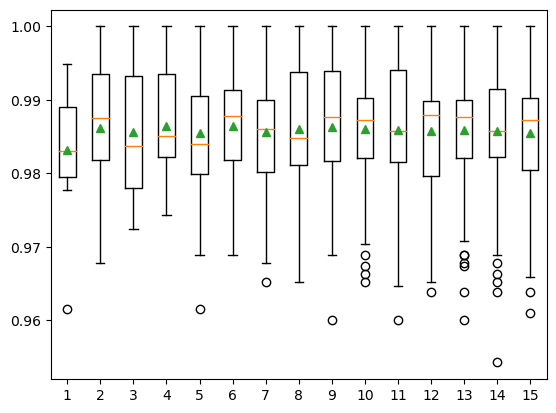

In [123]:
# repeated k-fold to see if the data is noisy
from sklearn.model_selection import RepeatedKFold
def e_model(x,y,rep):
    cv=RepeatedKFold(n_splits=10, n_repeats=rep, random_state=1)
    model=RandomForestClassifier()
    scores=cross_val_score(model, x,y, cv=cv, scoring='f1')
    return scores


x=total_wine.drop(columns=['wine_type','alcohol'])
y=total_wine['wine_type']
x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
scale=MinMaxScaler()
x_train_n= scale.fit_transform(x_train)
x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
x_test_n= scale.transform(x_test)
x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
repeat=range(1,16)
res=[]
for i in repeat:
    scores=e_model(x_train_n,y_train, i)
    print('The mean and std are: {}, {}'.format('%0.5f'%np.mean(scores),'%0.5f'%np.std(scores)))
    res.append(scores)

plt.boxplot(res, labels=[str(r) for r in repeat], showmeans=True)
plt.show()


In [124]:
total_wine.value_counts()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density  pH    sulphates  alcohol  quality  wine_type
7.0            0.15              0.28         14.7            0.051      29.0                 149.0                 0.99792  2.96  0.39       9.0      7        0            8
7.3            0.19              0.27         13.9            0.057      45.0                 155.0                 0.99807  2.94  0.41       8.8      8        0            8
7.4            0.16              0.30         13.7            0.056      33.0                 168.0                 0.99825  2.90  0.44       8.7      7        0            7
6.8            0.18              0.30         12.8            0.062      19.0                 171.0                 0.99808  3.00  0.52       9.0      7        0            7
7.4            0.19              0.30         12.8            0.053      48.5                 229.0                 0.99860  3.14 

([<matplotlib.patches.Wedge at 0x7ff7df3b95e0>,
 [Text(-0.8608720613232703, 0.6847622171476926, '0'),
  Text(0.860872125435332, -0.6847621365470308, '1')],
 [Text(-0.4695665789036019, 0.3735066638987414, '78.61'),
  Text(0.4695666138738174, -0.373506619934744, '21.39')])

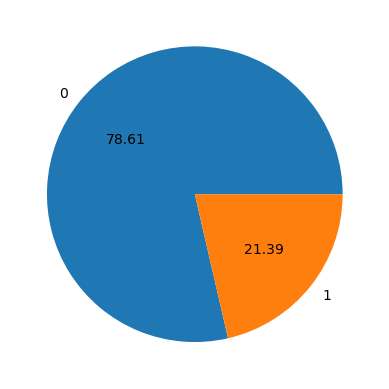

In [125]:
plt.pie(total_wine['wine_type'].value_counts(), labels=total_wine['wine_type'].unique(), autopct='%.2f')